## Classification by Linear Discriminant Analysis
- $\textbf{FatecRL Data Science}$

> Statistical Learning Theory

In [1]:
# Instalações necessárias
!pip install -q xlrd

# Importando bibliotecas
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Objetivo
from sklearn.model_selection import train_test_split # Separa os dados para Treino
from sklearn.metrics import accuracy_score # Pontuador para Acurácia

# Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
ib = pd.read_csv('/kaggle/input/discriminant-analysis/inibina.xls - dados.csv')
tf = pd.read_excel('/kaggle/input/discriminant-analysis/tipofacial.xls')

# Tratando os Valores Decimais
for col in ['inibpre', 'inibpos']: ib[col] = ib[col].str.replace(',', '.').astype(float)

# Substituindo Positivo e Negativo por 1 e 0 e removendo a coluna
ib['resposta'] = ib['resposta'].apply(lambda x: 1 if x == 'positiva' else 0)
ib = ib.drop('ident', axis=1)

# Tornando o Sexo como Variável Númerica
tf['sexo'] = tf['sexo'].apply(lambda x: 0 if x == 'M' else 1)
tf['grupo'] = tf['grupo'].apply(lambda x: 1 if x == 'braq' else 2 if x =='dolico' else 3)

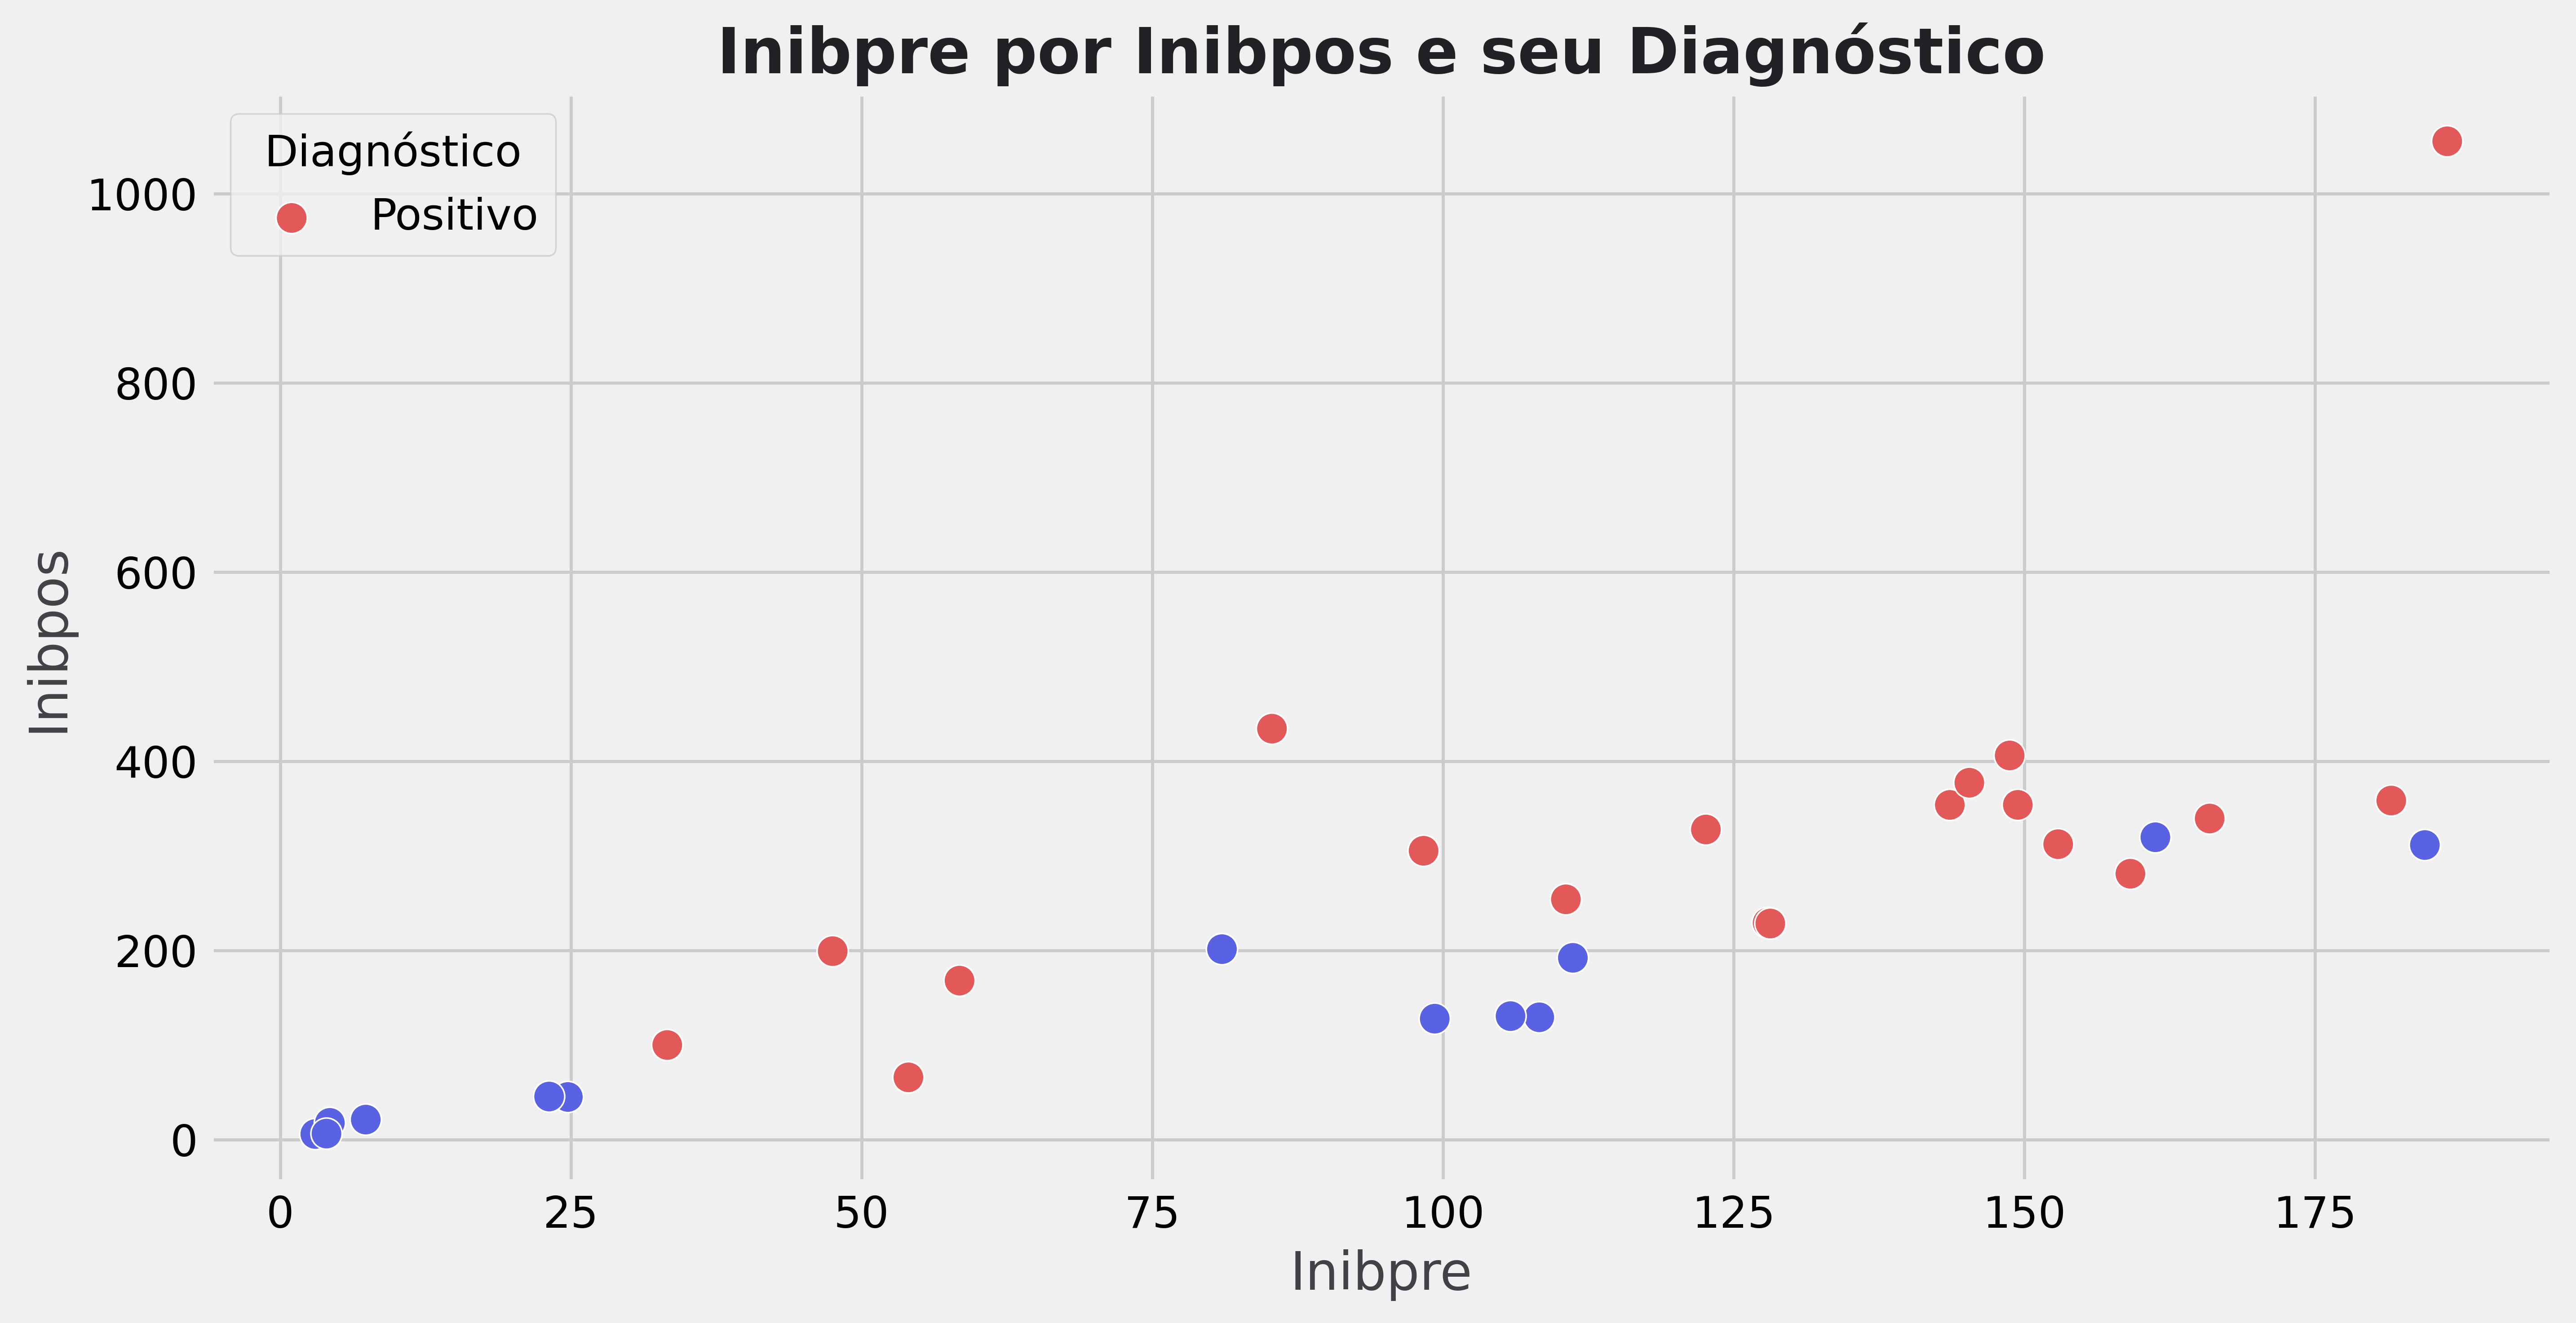

In [3]:
X = ib[['inibpre', 'inibpos']].values
y = ib['resposta'].values

cores = ['#E35959' if i == 1 else '#5962E3' for i in y]

plt.figure(figsize=(12, 6), dpi=500)
plt.scatter(ib['inibpre'], ib['inibpos'], c=cores, s=100, edgecolors='w')

plt.legend(['Positivo'], title='Diagnóstico')
plt.title('Inibpre por Inibpos e seu Diagnóstico', fontweight='bold', color='#202124')
plt.xlabel('Inibpre', color='#404248')
plt.ylabel('Inibpos', color='#404248')
plt.show()

In [4]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

# Iniciando e ajustando o modelo Discriminante
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [5]:
# Y Predito com Dados de Treino
y_pred_train = lda.predict(X_train)

# Avaliando a precisão do modelo
acc1 = accuracy_score(y_train, y_pred_train)
print(f'Acurácia | Dados de Traino: {acc1:.4f}')

# Y Predito com Dados de Teste
y_pred_test = lda.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_test)
print(f'Acurácia | Dados de Teste: {acc2:.4f}')

Acurácia | Dados de Traino: 0.7727
Acurácia | Dados de Teste: 0.7000


In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

y_pred = lda.predict(X)
acc = accuracy_score(y, y_pred)
print(f'Acurácia do Modelo Final: {acc:.4f}')

Acurácia do Modelo Final: 0.7812


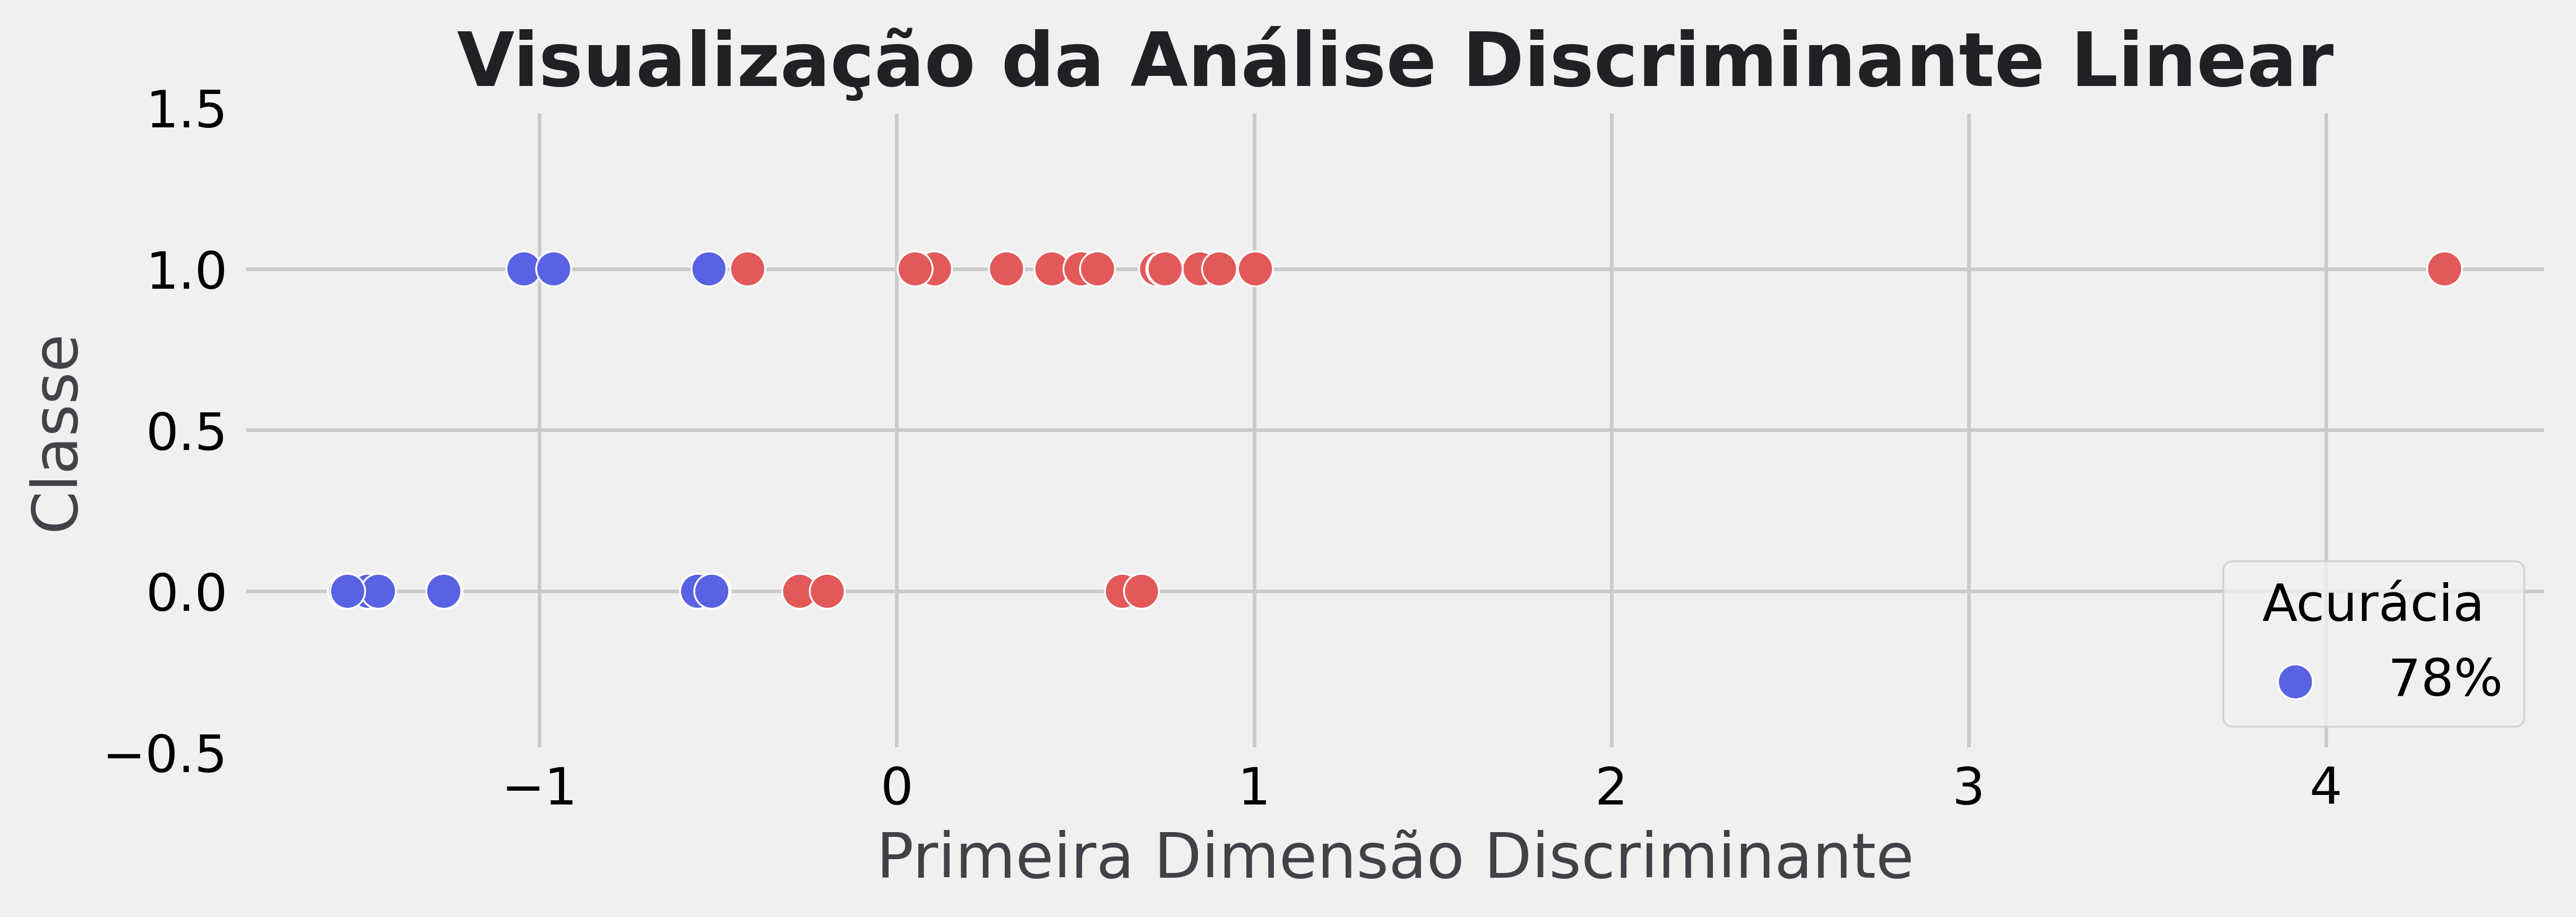

In [7]:
# Transformando os dados para a primeiras dimensões discriminantes
X_lda = lda.transform(X)

# Definindo as Cores com base no Modelo
cores = ['#E35959' if i == 1 else '#5962E3' for i in y_pred]

# Gráfico de dispersão
plt.figure(figsize=(10, 3), dpi=500)
plt.scatter(X_lda, y, c=cores, s=90, edgecolor='w')

plt.title('Visualização da Análise Discriminante Linear', fontweight='bold', color='#202124')
plt.legend(['78%'], title='Acurácia')
plt.xlabel('Primeira Dimensão Discriminante', color='#404248')
plt.ylabel('Classe', color='#404248')
plt.ylim([-.5, 1.5])
plt.show()

In [8]:
X = tf[['sexo', 'idade', 'nsba', 'ns', 'sba', 'altfac', 'proffac', 'eixofac', 'planmand', 'arcomand', 'vert']].values
y = tf['grupo'].values

In [9]:
# Conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

# Ajustando o modelo Discriminante
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# Predição e acurácia com os mesmos dados
y_pred_train = lda.predict(X_train)
acc1 = accuracy_score(y_train, y_pred_train)
print(f'Acurácia | Treino: {acc1:.4f}')

# Predição e acuráci com dados de Teste
y_pred_test = lda.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_test)
print(f'Acurácia | Teste: {acc2:.4f}')

Acurácia | Treino: 0.9571
Acurácia | Teste: 0.9677


In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

y_pred = lda.predict(X)
acc = accuracy_score(y, y_pred)
print(f'Acurácia do Modelo: {acc:.4f}')

Acurácia do Modelo: 0.9604


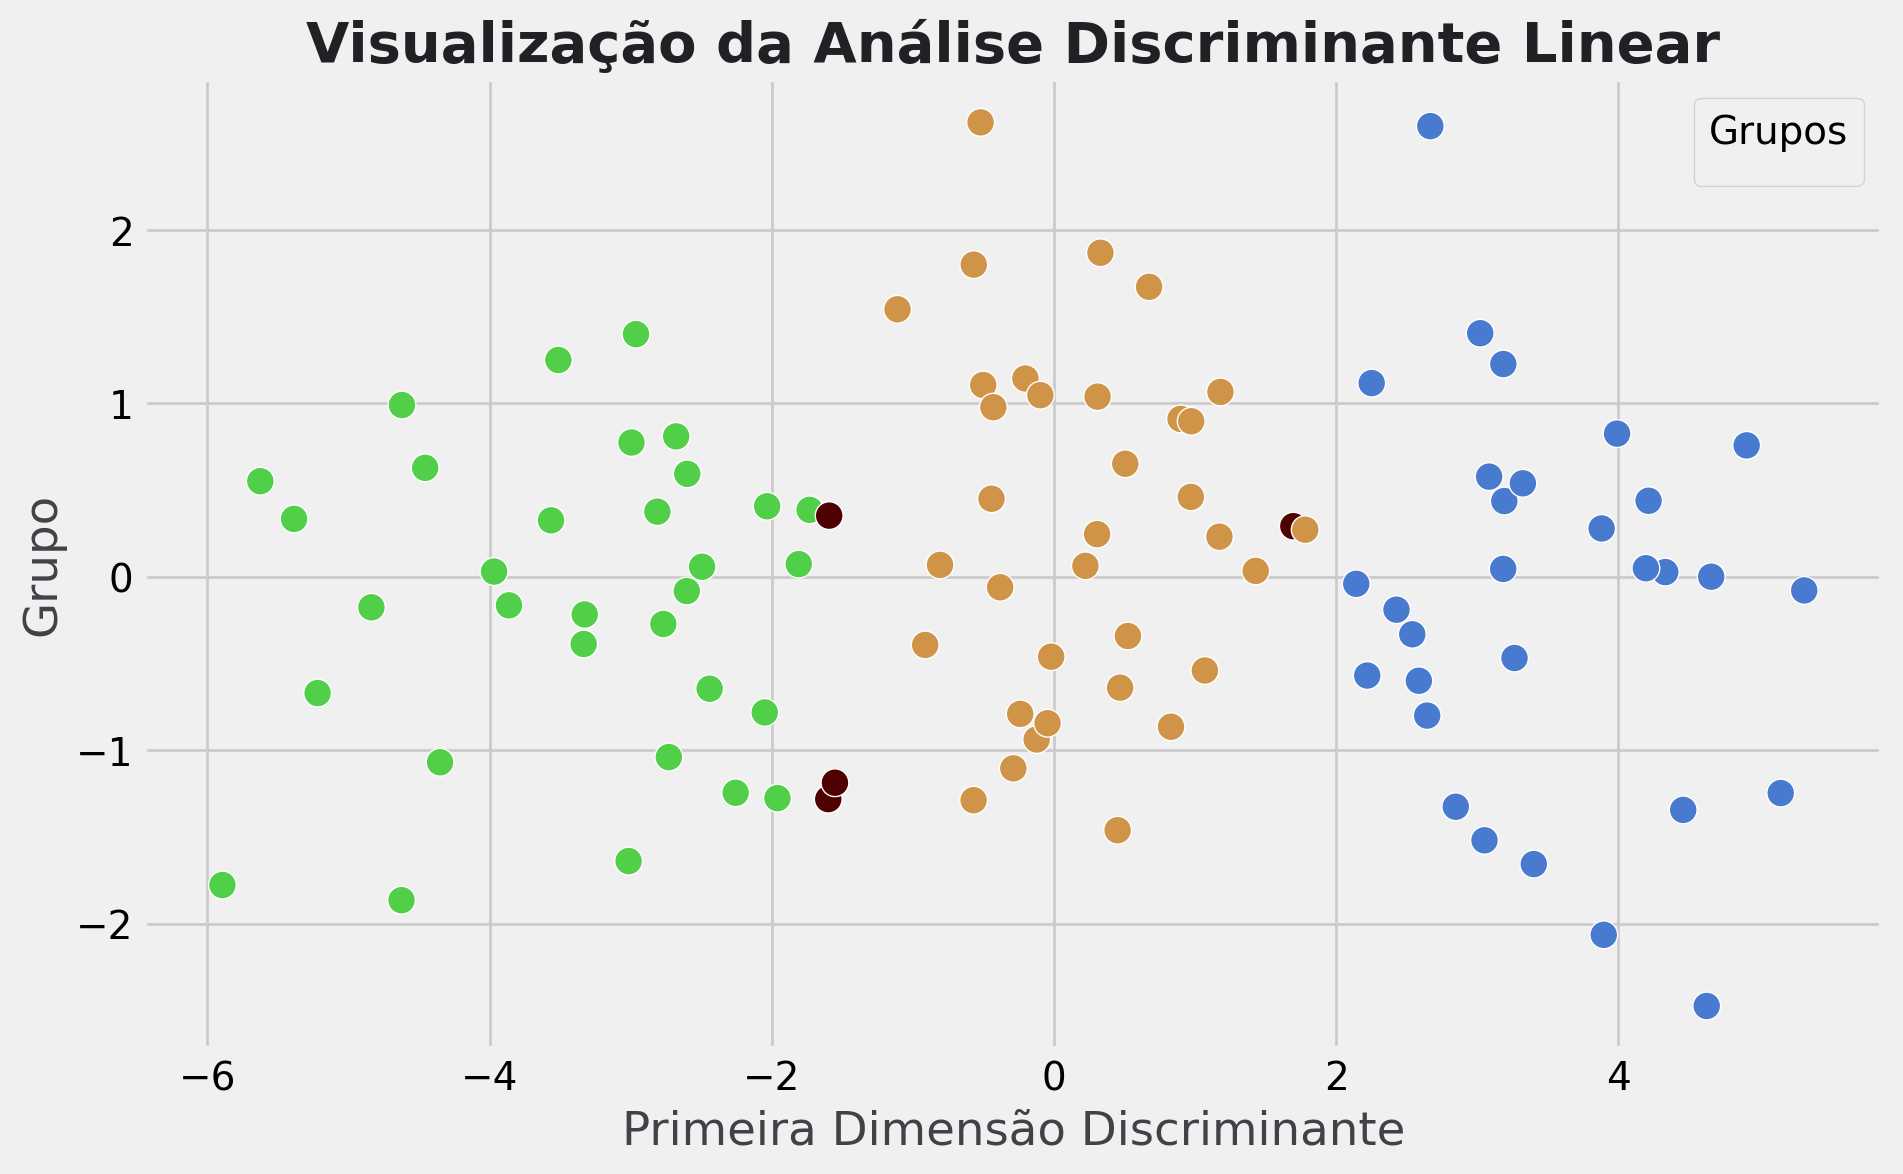

In [12]:
# Transformando os dados para a duas primeiras dimensões discriminantes
X_lda = lda.transform(X)

# Definindo as cores e destacando a cor errada
cores = ['#51cf48' if i == 1 else '#487acf' if i == 2 else '#cf9448' for i in y_pred]
for i, (a, b) in enumerate(zip(y, y_pred)):
    if a != b: cores[i] = '#4f0000'
        
# Criando um gráfico de dispersão aprimorado
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(X_lda[:,0], X_lda[:,1], c=cores, edgecolor='w', s=100)

# Adicionando rótulos e legendas
plt.title('Visualização da Análise Discriminante Linear', fontweight='bold', color='#202124')
plt.xlabel('Primeira Dimensão Discriminante', color='#404248')
plt.ylabel('Grupo', color='#404248')
plt.legend(title='Grupos')

plt.show()